<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/main/DATA/Data_2.csv')
cols = df.columns.tolist()
df.head()

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3
0,0,48.57,95.68,17.15,15.85,0.92,27.64,133.36
1,0,48.57,95.68,16.46,15.85,0.97,24.55,34.06
2,0,48.57,95.68,29.70,15.85,17.40,29.07,30.70
3,0,48.57,95.68,17.97,15.85,1.70,18.59,36.08
4,0,48.57,95.68,37.76,15.85,22.10,39.33,39.31


Custom Regression Report:
Mean Absolute Error: 9.28
Mean Squared Error: 203.09
R-squared (R2): 0.52


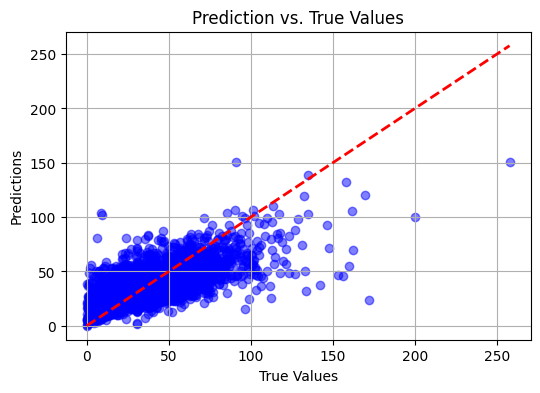

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training (60%), validation (20%), and test (20%) sets
train, temp = train_test_split(df, test_size=0.4, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Preprocessing function
def preprocess_data(dataframe):
    x = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values
    return x, y

# Apply preprocessing to datasets
train_x, train_y = preprocess_data(train)
valid_x, valid_y = preprocess_data(valid)
test_x, test_y = preprocess_data(test)

# Standardize features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.transform(valid_x)
test_x = scaler.transform(test_x)

# Train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_x, train_y)

# Predict on the test set
pred_y = rf_model.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
plt.figure(figsize=(6, 4))
plt.scatter(test_y, pred_y, alpha=0.5, color='blue')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs. True Values')
plt.grid(True)
plt.show()